In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("Microsoft_Stock_Price_Train.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,80.738167,22483800
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,81.113907,26061400
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,81.827827,21912000
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,82.842339,23407100
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,82.926865,22113000


In [4]:
# df.info()

In [5]:
# df.describe()

In [6]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date') # Converts date column of database from string format to datetime format

In [7]:
# plt.figure(figsize=(10,6))
# plt.subplot(2, 1, 1)
# plt.title('Microsoft Stock Price')
# plt.plot(df2.Close,label='Close price')
# plt.legend()
# plt.subplot(2, 1, 2)
# plt.title('Volume Traded')
# plt.bar(x=df2.index,height=df2['Volume'])
# plt.show()

### ARIMA MODEL

In [8]:
data = list(df2["Open"])

In [9]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(data)
# print("1. ADF : ",result[0])
# print("2. P-Value : ", result[1])
# print("3. Num Of Lags : ", result[2])
# print("4. Num Of Observations Used For ADF Regression:", result[3])
# print("5. Critical Values :")
# for key, val in result[4].items():
#   print("\t",key, ": ", val)

In [10]:
# from pmdarima.arima.utils import ndiffs
# d_value = ndiffs(data,test = "adf")
# print("d value:", d_value)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [12]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1159 100


In [13]:
# stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
# print(stepwise_fit.summary())

In [14]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0)) #In this code, we are specifying order=(5,2,0) which means that we want to fit an ARIMA model with p=5, d=2, and q=0. This indicates that we are including the previous five observations (lags) in the autoregressive model and we have differenced the data twice to make it stationary.
model = model.fit()

In [15]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([280.47120635, 289.65466302, 293.34127689, 289.18820743,
       293.36830012, 293.57729224, 291.44497699, 290.67860404,
       288.78355316, 281.27445998, 274.4786924 , 272.9049325 ,
       274.86183923, 276.59053115, 262.32258016, 264.33357743,
       264.11094218, 255.61490406, 258.93196566, 252.55749615,
       252.49961996, 256.06828733, 259.12143818, 266.34094776,
       258.61232775, 253.59726279, 249.89955923, 242.23657866,
       239.34249792, 237.88361372, 241.27420379, 235.27039147,
       237.69434101, 236.23703164, 239.03001141, 236.11039819,
       237.66112268, 238.60212301, 234.63835587, 246.1268891 ,
       246.78292504, 249.21311457, 242.11412971, 232.89614721,
       227.22998137, 222.14251753, 215.32444549, 232.24351237,
       234.42211838, 243.62915887, 239.6788297 , 237.76042858,
       238.17308727, 244.46464688, 248.7022785 , 229.479265  ,
       230.86550405, 225.75734509, 232.41436931, 232.70862418,
       226.00356347, 219.2150213 , 215.92710258, 221.13

In [16]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-08-10    280.471206
2022-08-11    289.654663
2022-08-12    293.341277
2022-08-15    289.188207
2022-08-16    293.368300
                 ...    
2022-12-23    238.343857
2022-12-27    232.874798
2022-12-28    237.046515
2022-12-29    235.693719
2022-12-30    234.725486
Length: 100, dtype: float64

In [17]:
# plt.figure(figsize=(7,4), dpi=100)
# df2['Open'][-100:].plot(label='Actual Stock Price', legend=True)
# s.plot(label='Predicted Price', legend=True,)

In [18]:
# from statsmodels.graphics.tsaplots import plot_predict
# plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [19]:
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(x_test,pred))


In [20]:
# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error)
# print('RMSE:', rmse)

In [21]:
# from sklearn.metrics import r2_score
# r2_score(x_test,pred)

In [22]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([234.72548564, 237.64113347, 236.91483209, 236.93725441,
       236.79928629, 236.80986564, 236.97545239, 236.74460483,
       236.58538088, 236.53704489, 236.4923852 ])

In [23]:
import datetime
start_date = datetime.datetime(2022,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [24]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-31    234.725486
2023-01-01    237.641133
2023-01-02    236.914832
2023-01-03    236.937254
2023-01-04    236.799286
2023-01-05    236.809866
2023-01-06    236.975452
2023-01-07    236.744605
2023-01-08    236.585381
2023-01-09    236.537045
2023-01-10    236.492385
dtype: float64

In [25]:
# plt.figure(figsize=(10,6), dpi=100)
# df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
# pred_future2.plot(label='Future Predicted Price', legend=True)

## Comparing predicted prices with real prices

In [26]:
check_df = pd.read_csv("Microsoft_Stock_Price_Test.csv")

In [27]:
check_df.Date= pd.to_datetime(check_df.Date)
check_df2 =check_df.set_index('Date')

In [28]:
# check_df2

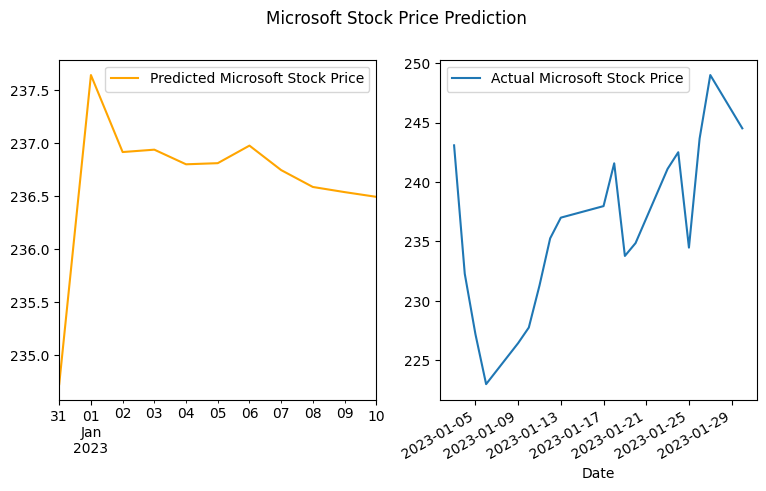

In [29]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
plt.suptitle('Microsoft Stock Price Prediction')
pred_future2.plot(label='Predicted Microsoft Stock Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['Open'].plot(label='Actual Microsoft Stock Price', legend=True)
plt.show()

## Evaluating the model
### Showing the closeness of predicted value and actual value

In [30]:
# RMSE
rmse = np.sqrt(mean_squared_error(x_test, pred))
print('Root Mean Squared Error:', rmse)
# Calculate MAE
mae = mean_absolute_error(x_test, pred)
print('Mean Absoulte Error:', mae)

Root Mean Squared Error: 5.761355235524902
Mean Absoulte Error: 4.537731179455768


### Showing the variance in the Target variable

In [31]:
# R-squared to show how well the model fits the data
r2 = r2_score(x_test, pred)
print("R2 score: ", r2)


R2 score:  0.8932286368566209


In [32]:
# Calculate MSE
mse = mean_squared_error(x_test, pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 33.1932141499102


In [33]:
# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 5.761355235524902
